In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
iris = load_iris(return_X_y = False)

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X = iris.data[:,2:]
y = iris.target
print(X.shape , y.shape)

(150, 2) (150,)


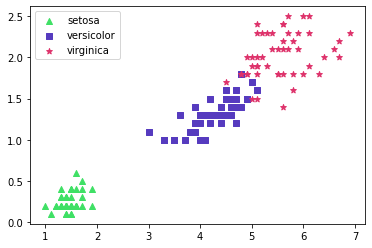

In [5]:
colors = ["#3fe065", "#563bbf", "#de316a"]
markers = ["^", "s", "*"]
for i,name in enumerate(iris.target_names):
    samples = (y==i) # i=0, 1, 2
    plt.scatter(X[samples,0], X[samples,1], c=colors[i], marker=markers[i], label=name)
plt.legend()
plt.show()

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
y==0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [8]:
samples = (y==0) | (y == 1)
samples

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [9]:
X , y = X[samples] , y[samples]
print(X.shape , y.shape) 

(100, 2) (100,)


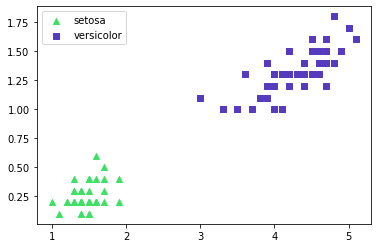

In [10]:
colors = ["#3fe065", "#563bbf", "#de316a"]
markers = ["^", "s", "*"]
for i,name in enumerate(iris.target_names[:-1]):
    samples = (y==i) # i=0, 1, 2
    plt.scatter(X[samples,0], X[samples,1], c=colors[i], marker=markers[i], label=name)
plt.legend()
plt.show()

In [11]:
from sklearn.svm import LinearSVC

In [12]:
lin_svc = LinearSVC()

In [13]:
lin_svc.fit(X,y)

LinearSVC()

In [14]:
lin_svc.predict([[2.4,1]])

array([1])

### Decision Boundary

In [15]:
f1 = np.linspace(X[:,0].min(), X[:,0].max(), 80)
f2 = np.linspace(X[:,1].min(), X[:,1].max(), 80)
f1, f2 = np.meshgrid(f1, f2)
X_test = np.concatenate([f1.reshape(-1,1), f2.reshape(-1,1)], axis=1)
print(X_test.shape)

(6400, 2)


In [16]:
ypred = lin_svc.predict(X_test)

In [17]:
from matplotlib.colors import ListedColormap

In [18]:
cmap = ListedColormap(["#c6f79e", "#cbadff"])


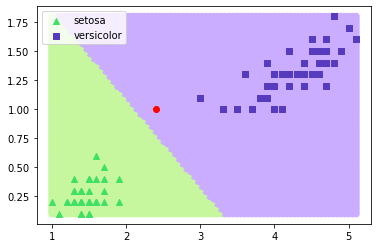

In [19]:
plt.scatter(X_test[:,0], X_test[:,1], c=ypred, cmap=cmap)

colors = ["#3fe065", "#563bbf", "#de316a"]
markers = ["^", "s", "*"]
for i,name in enumerate(iris.target_names[:-1]):
    samples = (y==i) # i=0, 1, 2
    plt.scatter(X[samples,0], X[samples,1], c=colors[i], marker=markers[i], label=name)
plt.legend()

plt.scatter(2.4, 1, c='r')
plt.show()

C is a hyperparameter
More C, Hard Margin Classification
Less C, soft margin classification

In [20]:
X_=np.concatenate([X,[[3,1]]],axis=0)
print(X_.shape)

(101, 2)


In [21]:
y_=np.concatenate([y,[0]],axis=0)
print(y_.shape)

(101,)


In [22]:
linsvc2 = LinearSVC(C=1)
linsvc2.fit(X_,y_)

LinearSVC(C=1)

In [23]:
ypred2 = linsvc2.predict(X_test)


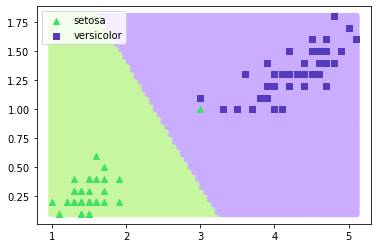

In [24]:
plt.scatter(X_test[:,0], X_test[:,1], c=ypred2, cmap=cmap)

colors = ["#3fe065", "#563bbf", "#de316a"]
markers = ["^", "s", "*"]
for i,name in enumerate(iris.target_names[:-1]):
    samples = (y_==i) # i=0, 1, 2
    plt.scatter(X_[samples,0], X_[samples,1], c=colors[i], marker=markers[i], label=name)
plt.legend()

plt.show()

C:\Users\Subhajit ghosh\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


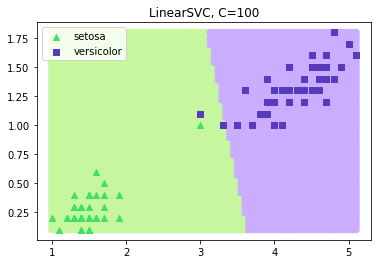

In [25]:
linsvc3 = LinearSVC(C=100) # hard margin classification
linsvc3.fit(X_,y_)
ypred3 = linsvc3.predict(X_test)

plt.scatter(X_test[:,0], X_test[:,1], c=ypred3, cmap=cmap)

colors = ["#3fe065", "#563bbf", "#de316a"]
markers = ["^", "s", "*"]
for i,name in enumerate(iris.target_names[:-1]):
    samples = (y_==i) # i=0, 1, 2
    plt.scatter(X_[samples,0], X_[samples,1], c=colors[i], marker=markers[i], label=name)
plt.legend()
plt.title("LinearSVC, C=100")
plt.show()

In [26]:
from sklearn.svm import SVC

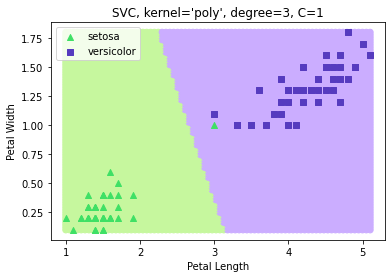

In [27]:
svc = SVC(kernel='poly', degree=3, C=1) # Soft margin classification, allows margin violation
svc.fit(X_,y_)
ypred = svc.predict(X_test)

plt.scatter(X_test[:,0], X_test[:,1], c=ypred, cmap=cmap)

colors = ["#3fe065", "#563bbf", "#de316a"]
markers = ["^", "s", "*"]
for i,name in enumerate(iris.target_names[:-1]):
    samples = (y_==i) # i=0, 1, 2
    plt.scatter(X_[samples,0], X_[samples,1], c=colors[i], marker=markers[i], label=name)
plt.legend()
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("SVC, kernel='poly', degree=3, C=1")
plt.show()

## SVC with kernel trick

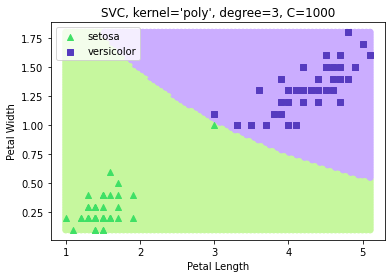

In [28]:
svc2 = SVC(kernel='poly', degree=2, C=1000) # Hard margin classification, doesn't allow margin violation
svc2.fit(X_,y_)
ypred2 = svc2.predict(X_test)

plt.scatter(X_test[:,0], X_test[:,1], c=ypred2, cmap=cmap)

colors = ["#3fe065", "#563bbf", "#de316a"]
markers = ["^", "s", "*"]
for i,name in enumerate(iris.target_names[:-1]):
    samples = (y_==i) # i=0, 1, 2
    plt.scatter(X_[samples,0], X_[samples,1], c=colors[i], marker=markers[i], label=name)
plt.legend()
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("SVC, kernel='poly', degree=3, C=1000")
plt.show()

In [29]:
from sklearn.datasets import make_moons

(200, 2) (200,)


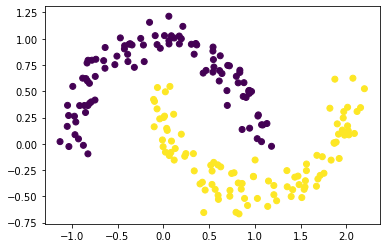

In [30]:
X, y = make_moons(n_samples=200, noise=0.1, random_state=50)
print(X.shape, y.shape)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [31]:
f1 = np.linspace(X[:,0].min(), X[:,0].max(), 80)
f2 = np.linspace(X[:,1].min(), X[:,1].max(), 80)
f1, f2 = np.meshgrid(f1, f2)
X_test2 = np.concatenate([f1.reshape(-1,1), f2.reshape(-1,1)], axis=1)
print(X_test2.shape)

(6400, 2)


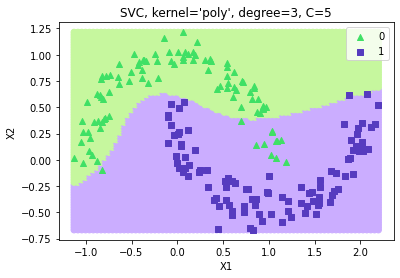

In [32]:
svc = SVC(kernel='poly', degree=3, C=5) # Soft margin classification, allow margin violation
svc.fit(X,y)
ypred = svc.predict(X_test2)

plt.scatter(X_test2[:,0], X_test2[:,1], c=ypred, cmap=cmap)

colors = ["#3fe065", "#563bbf", "#de316a"]
markers = ["^", "s", "*"]
for i in [0,1]:
    samples = (y==i) # i=0, 1, 2
    plt.scatter(X[samples,0], X[samples,1], c=colors[i], marker=markers[i], label=i)
plt.legend()
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("SVC, kernel='poly', degree=3, C=5")
plt.show()

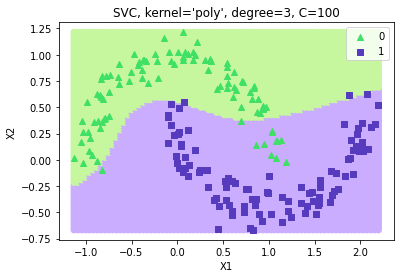

In [33]:
svc = SVC(kernel='poly', degree=3, C=100) # Hard margin classification, allow margin violation
svc.fit(X,y)
ypred = svc.predict(X_test2)

plt.scatter(X_test2[:,0], X_test2[:,1], c=ypred, cmap=cmap)

colors = ["#3fe065", "#563bbf", "#de316a"]
markers = ["^", "s", "*"]
for i in [0,1]:
    samples = (y==i) # i=0, 1, 2
    plt.scatter(X[samples,0], X[samples,1], c=colors[i], marker=markers[i], label=i)
plt.legend()
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("SVC, kernel='poly', degree=3, C=100")
plt.show()

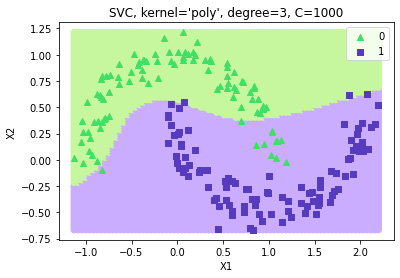

In [34]:
svc = SVC(kernel='poly', degree=3, C=1000) # Hard margin classification, allow margin violation
svc.fit(X,y)
ypred = svc.predict(X_test2)

plt.scatter(X_test2[:,0], X_test2[:,1], c=ypred, cmap=cmap)

colors = ["#3fe065", "#563bbf", "#de316a"]
markers = ["^", "s", "*"]
for i in [0,1]:
    samples = (y==i) # i=0, 1, 2
    plt.scatter(X[samples,0], X[samples,1], c=colors[i], marker=markers[i], label=i)
plt.legend()
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("SVC, kernel='poly', degree=3, C=1000")
plt.show()

-above plot shows that kernel poly is not able to classify the data properly

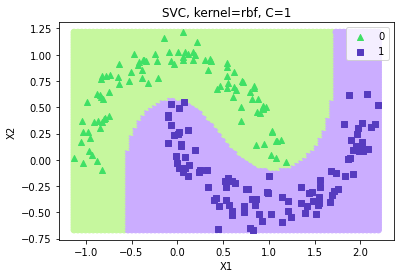

In [35]:
c = 1
ker = 'rbf'
svc = SVC(kernel=ker, C=c) # Hard margin classification, allow margin violation
svc.fit(X,y)
ypred = svc.predict(X_test2)

plt.scatter(X_test2[:,0], X_test2[:,1], c=ypred, cmap=cmap)

colors = ["#3fe065", "#563bbf", "#de316a"]
markers = ["^", "s", "*"]
for i in [0,1]:
    samples = (y==i) # i=0, 1, 2
    plt.scatter(X[samples,0], X[samples,1], c=colors[i], marker=markers[i], label=i)
plt.legend()
plt.xlabel("X1")
plt.ylabel("X2")
plt.title(f"SVC, kernel={ker}, C={c}")
plt.show()

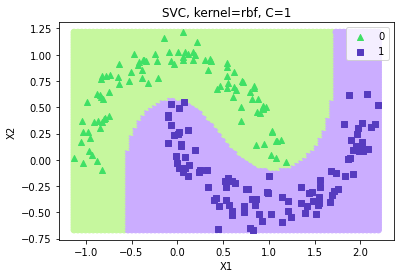

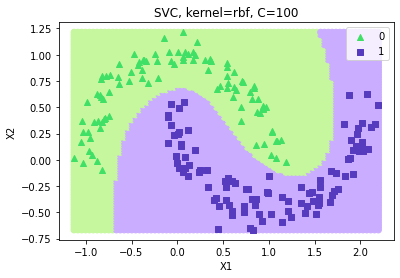

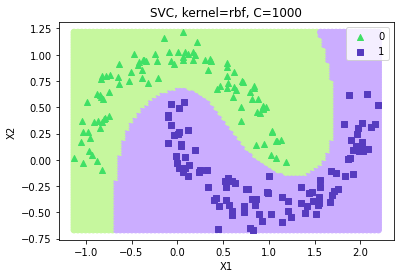

In [36]:
cs = [1,100,1000]
for c in cs:
    ker = 'rbf'
    svc = SVC(kernel=ker, C=c) # Hard margin classification, allow margin violation
    svc.fit(X,y)
    ypred = svc.predict(X_test2)

    plt.scatter(X_test2[:,0], X_test2[:,1], c=ypred, cmap=cmap)

    colors = ["#3fe065", "#563bbf", "#de316a"]
    markers = ["^", "s", "*"]
    for i in [0,1]:
        samples = (y==i) # i=0, 1, 2
        plt.scatter(X[samples,0], X[samples,1], c=colors[i], marker=markers[i], label=i)
    plt.legend()
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title(f"SVC, kernel={ker}, C={c}")
    plt.show()

## Regression

In [38]:
from sklearn.svm import LinearSVR , SVR # SUPPORT VECTOR REGRESSION
from sklearn.datasets import make_regression

(200, 1) (200,)


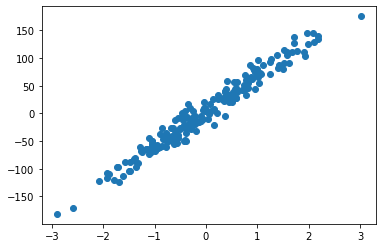

In [39]:
X, y = make_regression(n_samples=200,
    n_features=1, noise=14, bias=5, random_state = 30)
print(X.shape, y.shape)

plt.scatter(X, y)
plt.show()

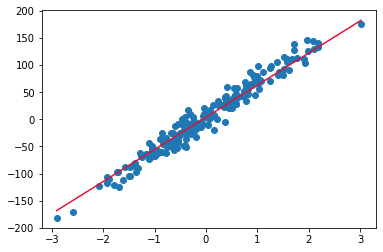

In [40]:
reg = LinearSVR()
reg.fit(X, y)

x_test = np.linspace(X.min(), X.max(), 50).reshape(-1,1)
ypred = reg.predict(x_test.reshape(-1,1))

plt.scatter(X, y)
plt.plot(x_test, ypred, c='crimson')
plt.show()

(50,)


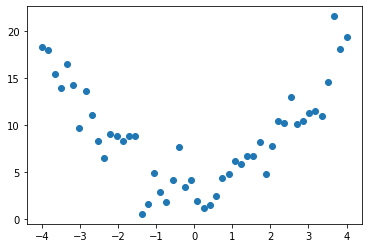

In [41]:
m = 50
x = np.linspace(-4, 4, m)
noise = np.random.randn(m,)
print(noise.shape)
y = x**2 + 2*noise + 3

plt.scatter(x, y)
plt.show()

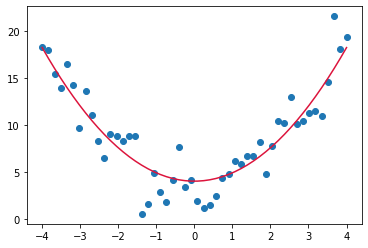

In [42]:
svr = SVR(kernel='poly', degree=2, C=1)
svr.fit(x.reshape(-1,1), y)
ypred = svr.predict(x.reshape(-1,1))
plt.scatter(x, y)
plt.plot(x, ypred, c='crimson')
plt.show()

In [43]:
svr.score(x.reshape(-1,1), y)

0.8496170921389867

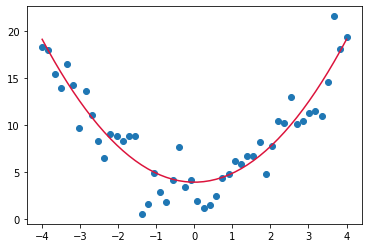

In [44]:
svr = SVR(kernel='poly', degree=2, C=10)
svr.fit(x.reshape(-1,1), y)
ypred = svr.predict(x.reshape(-1,1))
plt.scatter(x, y)
plt.plot(x, ypred, c='crimson')
plt.show()

In [45]:
svr.score(x.reshape(-1,1), y)

0.853273555872888